In [122]:
import networkx as nx
import seaborn as sns
from pathlib import Path
import torch
import DQN_agent
from envs.GraphEnv.impnode import ImpnodeEnv
from test_and_compare import test_loop, hda
import matplotlib.pyplot as plt
import  numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [161]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

RESULTS_BASEPATH_TEST = 'results/trial'

subdir = 'data/30-50'
data_path = Path.cwd()/subdir

NUM_TEST_EPS = 100 # number of test episodes to run

seed = 2
max_removed_nodes = 2
env_test = ImpnodeEnv(anc='dw_nd', ba_nodes=(5, 10), ba_edges=4, max_removed_nodes=max_removed_nodes, seed=seed, render_option=False, data=True,
                      data_path=data_path,train_mode=False)

# create the dqn agent with the stored weights
dqn_agent_test = DQN_agent.DQNAgent(device=device,
                                    state_size=5,  # env_test.observation_space.shape[0],
                                    action_size=env_test.action_space.n,
                                    discount=0.0,
                                    eps_max=0.0,
                                    eps_min=0.0,
                                    eps_step=0.0,
                                    memory_capacity=0,
                                    lr=0,
                                    train_mode=False)
dqn_agent_test.load_model('{}/dqn_model'.format(RESULTS_BASEPATH_TEST))

In [162]:
# test the agent
actions, reward_history, ep_score_history = test_loop(env=env_test,
                                                        agent=dqn_agent_test,
                                                        NUM_TEST_EPS = NUM_TEST_EPS,
                                                        results_basepath=RESULTS_BASEPATH_TEST)


In [163]:
hda_actions, hda_reward_history, hda_ep_score_history = hda(NUM_TEST_EPS, max_removed_nodes, data_path)#, remove_node_force=actions)

0.419219168153113

In [130]:
rewards = {'reward_history':reward_history, 'HDA_reward_history':hda_reward_history}

0.11430924522838387

In [110]:
rewards

In [111]:
np.mean(reward_history)

{'0': 0.024193548387096787,
 '1': 0.008064516129032263,
 '2': 0.008064516129032263,
 '3': 0.05241935483870971,
 '4': 0.0766129032258065,
 '5': 0.08870967741935488,
 '6': 0.05241935483870971,
 '7': 0.0645161290322581,
 '8': 0.04032258064516131,
 '9': 0.048387096774193575,
 '10': 0.04032258064516131,
 '11': 0.03225806451612905,
 '12': 0.016129032258064526,
 '13': 0.020161290322580655,
 '14': 0.04032258064516131,
 '15': 0.020161290322580655,
 '16': 0.024193548387096787,
 '17': 0.016129032258064526,
 '18': 0.02822580645161292,
 '19': 0.024193548387096787,
 '20': 0.020161290322580655,
 '21': 0.016129032258064526,
 '22': 0.020161290322580655,
 '23': 0.024193548387096787,
 '24': 0.016129032258064526,
 '25': 0.020161290322580655,
 '26': 0.016129032258064526,
 '27': 0.016129032258064526,
 '28': 0.020161290322580655,
 '29': 0.016129032258064526,
 '30': 0.016129032258064526,
 '31': 0.016129032258064526,
 '32': 0.020161290322580655,
 '33': 0.020161290322580655,
 '34': 0.016129032258064526}

In [57]:
np.mean(hda_reward_history)

([0.400497159090909], [0.1660511363636364])

In [58]:
g = sns.lineplot(reward_history)
#g.set_xticks(range(len(reward_history)))

<Axes: >

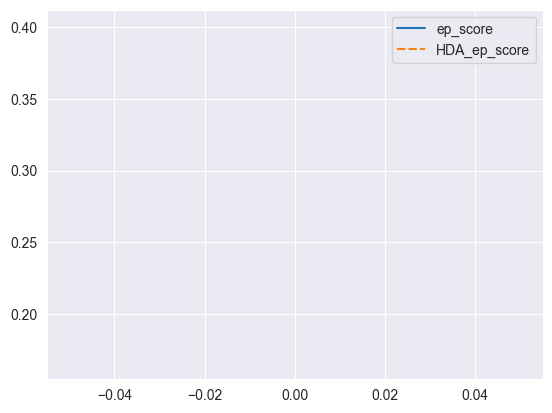

In [59]:
sns.lineplot(rewards)